# Smartwatch Data Movement Classification

## Setup

In [7]:
# import libraries
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

"imports"

'imports'

In [8]:
# copy ios.csv to ios_copy.csv
os.system("cp ios.csv ios_fix.csv")
fix_lines = []
header = []

with open("ios_fix.csv", "r") as f:
    lines = f.readlines()
    header = lines[0].split(",")
    # if value is empty, replace with NaN
    for l in lines:
        line = l.split(",")
        for value in range(len(line)):
            if line[value] == "":
                line[value] = "NaN"
        fix_lines.append(",".join(line[:len(header)]))

# write to ios_fix.csv
with open("ios_fix.csv", "w") as f:
    for line in fix_lines:
        f.write(line + "\n")


# copy android.csv to android_fix.csv
os.system("cp android.csv android_fix.csv")
fix_lines = []

"formatting fix"

'formatting fix'

In [9]:
# load iOS csv file (ignore empty values in csv)
df1 = pd.read_csv('ios_fix.csv', sep=',', na_values=["NaN"])

df1.drop([
    'SessionID', 'SessionDate', 'SessionDuration', 'SessionFrequency',
    'RecordID', 'GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ',
    'Timestamp', 'timeIntervalSince1970', 'WatchTimestamp'
], axis=1, inplace=True)

df1.rename(columns={
    'WatchtImeIntervalSince1970': 'Timestamp',
    'WatchGyroX': 'GyroX',
    'WatchGyroY': 'GyroY',
    'WatchGyroZ': 'GyroZ',
    'WatchAccX': 'AccX',
    'WatchAccY': 'AccY',
    'WatchAccZ': 'AccZ'
}, inplace=True)

df1['Timestamp'] = pd.to_datetime(df1['Timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('Europe/Budapest')
df1.head()

/Users/wittawinpanta/Library/Python/3.9/lib/python/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


,MagX,MagY,MagZ,Timestamp,GyroX,GyroY,GyroZ,AccX,AccY,AccZ
0,-21.330704,31.614380,-231.695877,2023-10-26 02:30:00.099293952+02:00,-0.002203,-0.001479,-0.001261,-0.108215,0.000031,-0.996933
1,-21.204132,31.789108,-231.629074,2023-10-26 02:30:00.115666944+02:00,0.003850,0.004151,-0.000277,-0.108749,0.001923,-0.995712
2,-21.184036,31.599808,-231.645462,2023-10-26 02:30:00.164969984+02:00,-0.004006,0.002535,-0.000909,-0.110916,-0.000687,-0.998184
3,-21.254562,31.505981,-231.552719,2023-10-26 02:30:00.171851264+02:00,-0.003478,0.005093,-0.000458,-0.109115,0.000946,-0.992935
4,-21.254562,31.505981,-231.552719,2023-10-26 02:30:00.201388800+02:00,-0.000545,0.003959,-0.001121,-0.107284,-0.000290,-0.995804


In [10]:
df2 = pd.read_csv('android_fix.csv', sep=',', na_values=["NaN"])

df2.drop([
    'LinAccX', 'LinAccY', 'LinAccZ',
], axis=1, inplace=True)


df2 = df2.rename(columns={
    'GyrX': 'GyroX',
    'GyrY': 'GyroY',
    'GyrZ': 'GyroZ',
})

df2['Timestamp'] = pd.to_datetime(df2['Timestamp'], unit='ms')
# convert to seconds
df2['Timestamp'] = df2['Timestamp'].dt.tz_localize('UTC').dt.tz_convert('Europe/Budapest')

df2.head()

,Timestamp,AccX,AccY,AccZ,MagX,MagY,MagZ,GyroX,GyroY,GyroZ
0,2023-10-26 02:29:59.498000+02:00,0.912191,0.378284,9.756372,NaN,NaN,NaN,-0.009774,0.008552,0.006109
1,2023-10-26 02:29:59.497000+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-10-26 02:29:59.507000+02:00,0.955287,0.478840,9.765948,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-26 02:29:59.508000+02:00,NaN,NaN,NaN,NaN,NaN,NaN,-0.205251,0.163712,-0.112399
4,2023-10-26 02:29:59.517000+02:00,0.960075,0.392649,9.852140,0.953572,0.477997,9.748466,0.086743,0.213803,-0.237016


/var/folders/j1/036bw0891b1_11t4t8cr50y40000gn/T/ipykernel_33996/4139156673.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1['Timestamp'] = tmp1['Timestamp'].apply(lambda x: x - datetime.timedelta(milliseconds=369))
/var/folders/j1/036bw0891b1_11t4t8cr50y40000gn/T/ipykernel_33996/4139156673.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1['Timestamp'] = tmp1['Timestamp'].apply(lambda x: x - datetime.timedelta(milliseconds=369))
/var/folders/j1/036bw0891b1_11t4t8cr50y40000gn/T/ipykernel_339

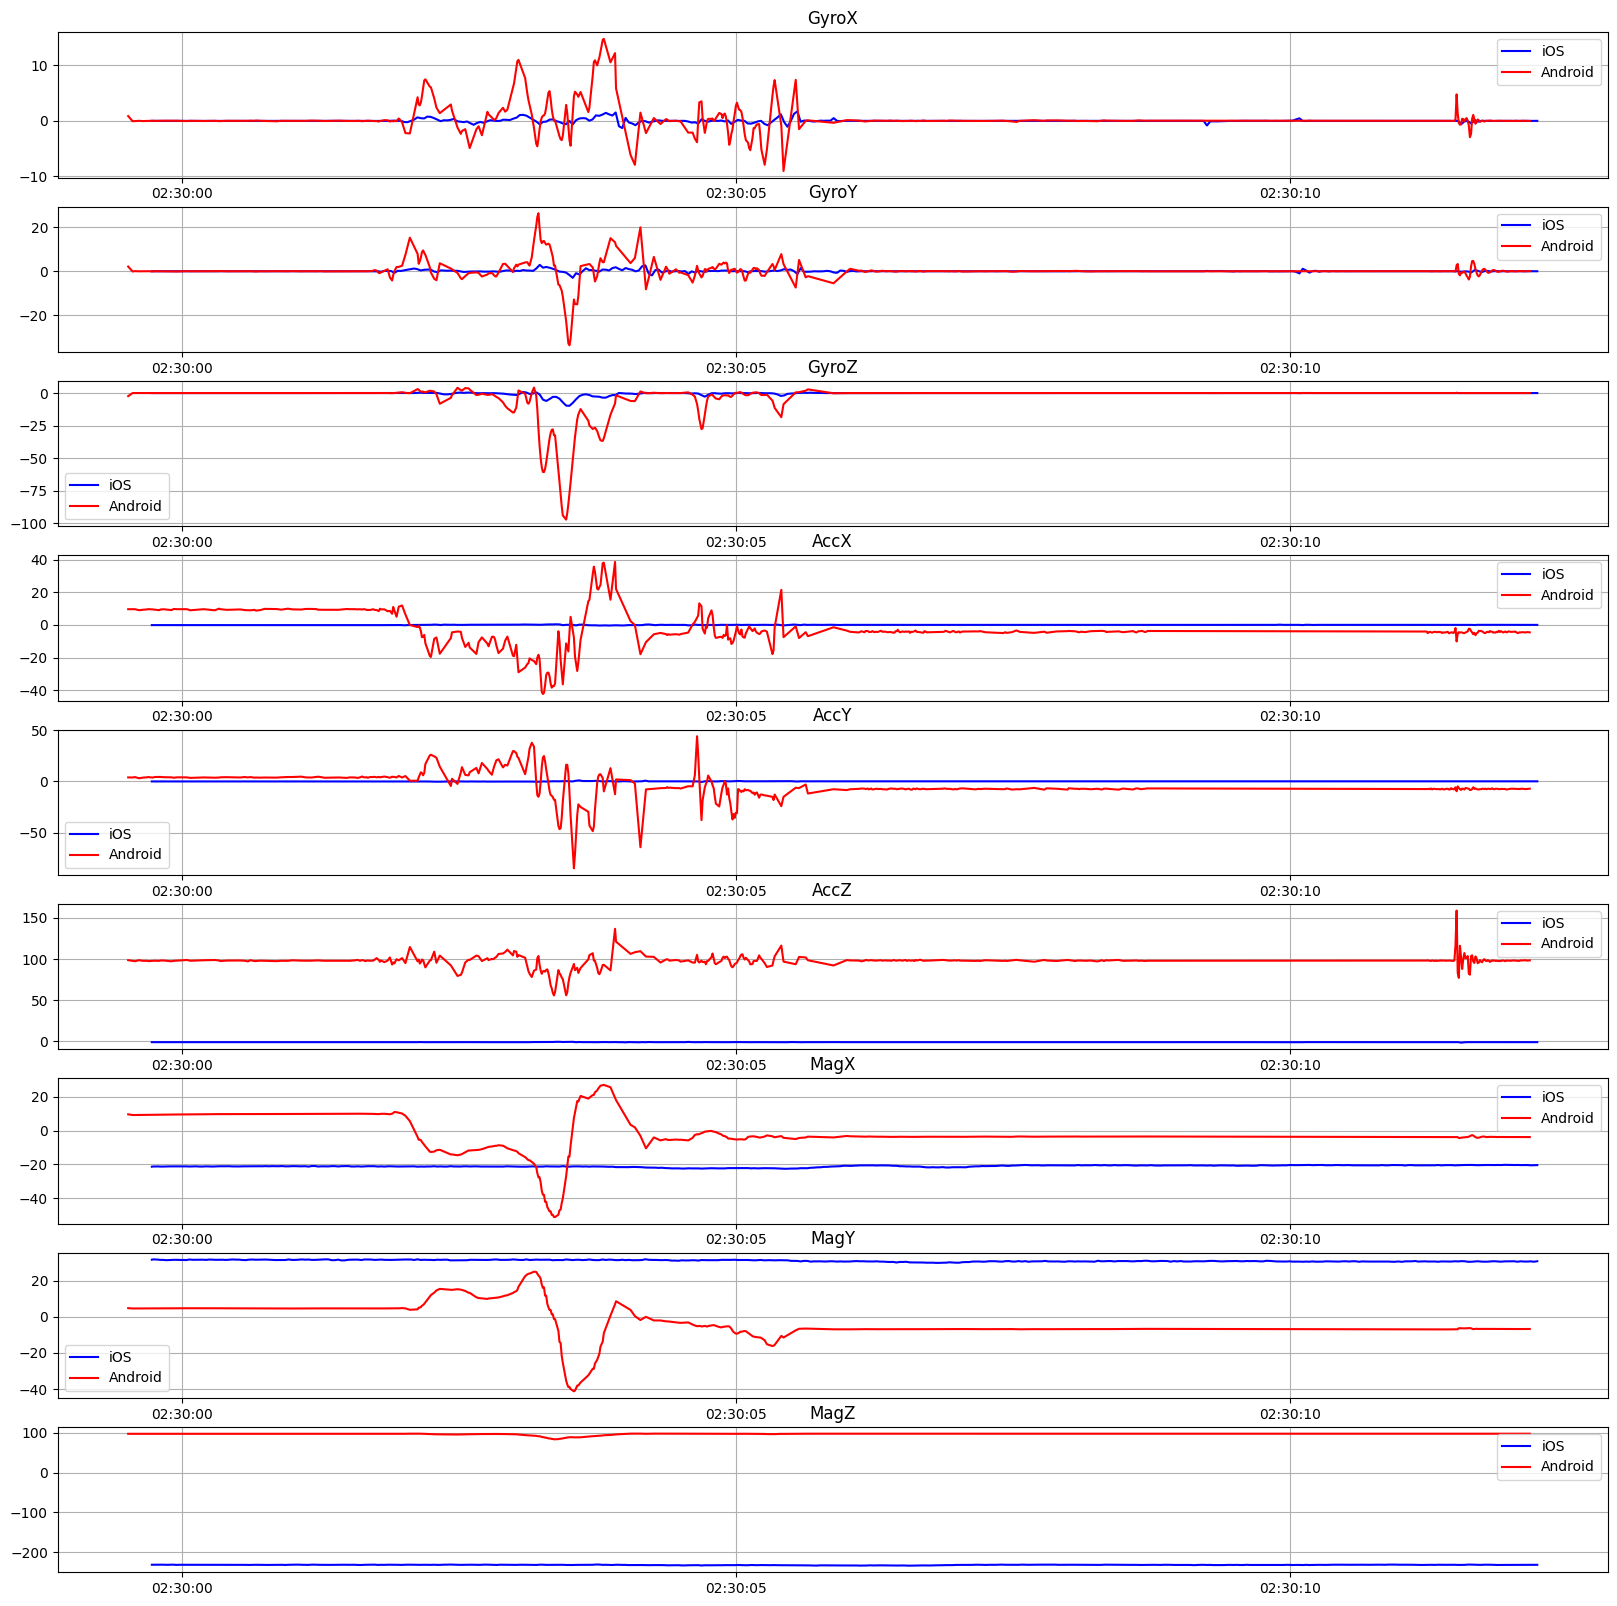

In [15]:
values = ['GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ', 'MagX', 'MagY', 'MagZ']

# plot len(values) x 1 graphs for df1 and df2 on same figure
fig, axs = plt.subplots(len(values), 1, figsize=(20, 20))
for i in range(len(values)):
    
    # ignore NaN values and use tmp as variable
    tmp1 = df1.dropna()
    tmp2 = df2.dropna()

    # for every Timestamp of tmp2 add 369 milliseconds
    tmp1['Timestamp'] = tmp1['Timestamp'].apply(lambda x: x - datetime.timedelta(milliseconds=369))
    # tmp2['AccX'] = tmp2['AccX'].apply(lambda x: x * 5)

    axs[i].plot(tmp1['Timestamp'], tmp1[values[i]], label='iOS', color='blue')
    axs[i].plot(tmp2['Timestamp'], tmp2[values[i]] * 10, label='Android', color='red')
    axs[i].set_title(values[i])
    axs[i].grid(True)
    axs[i].legend()

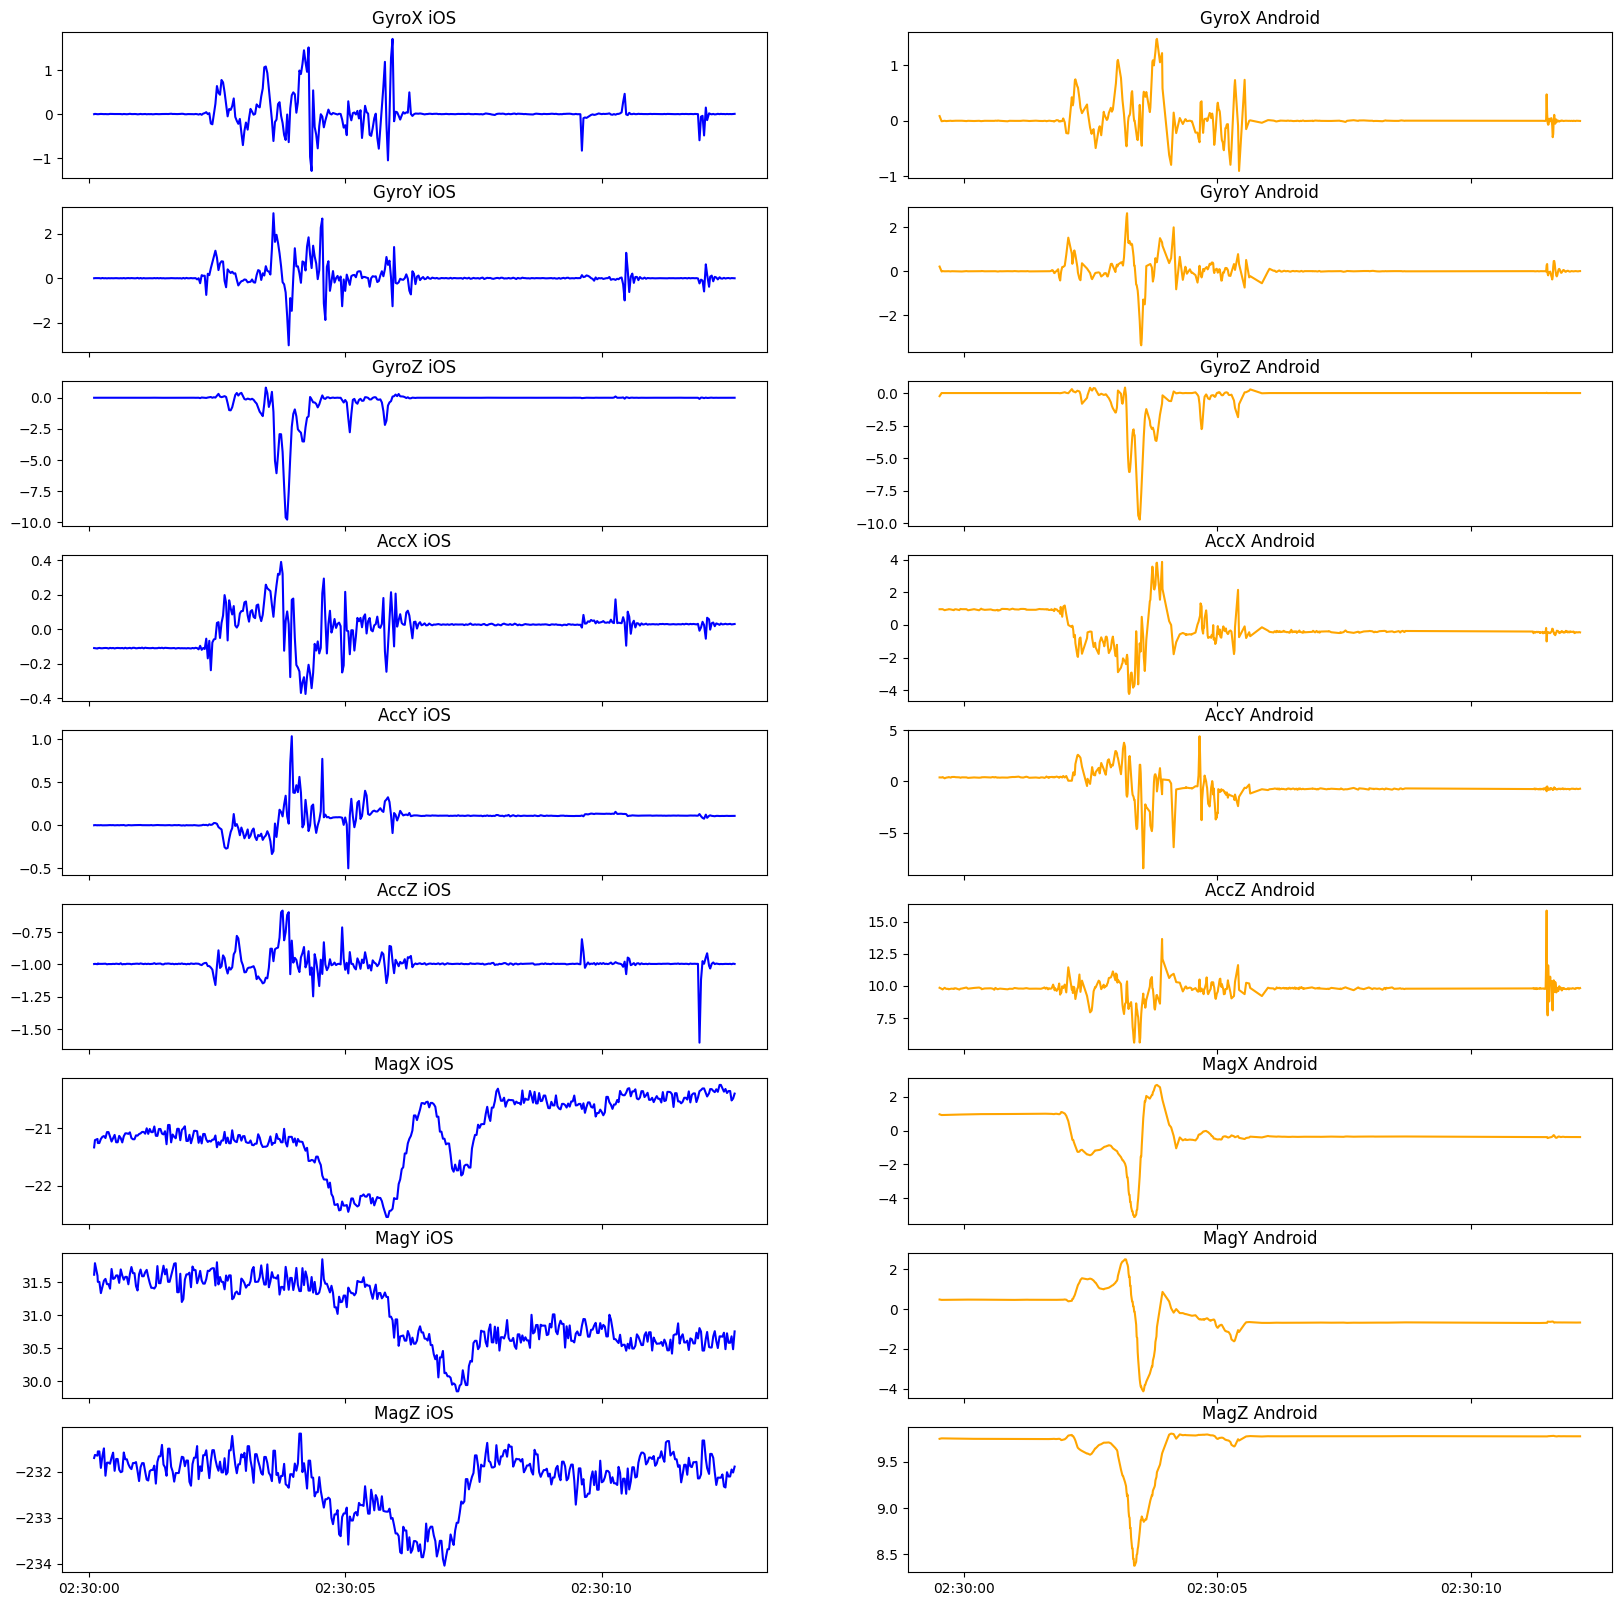

In [191]:
values = ['GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ', 'MagX', 'MagY', 'MagZ']

# plot len(values) x 2 graphs for df1 and df2 on same figure
fig, axs = plt.subplots(len(values), 2, figsize=(20, 20))
for i in range(len(values)):
    # ignore NaN values and use tmp as variable
    tmp1 = df1.dropna()
    tmp2 = df2.dropna()

    axs[i][0].plot(tmp1['Timestamp'], tmp1[values[i]], label='iOS', color='blue')
    axs[i][0].set_title(values[i] + ' iOS')
    axs[i][1].plot(tmp2['Timestamp'], tmp2[values[i]], label='Android', color='orange')
    axs[i][1].set_title(values[i] + ' Android')
    # hide x-axis labels for all but last row
    if i != len(values) - 1:
        axs[i][0].set_xticklabels([])
        axs[i][1].set_xticklabels([])

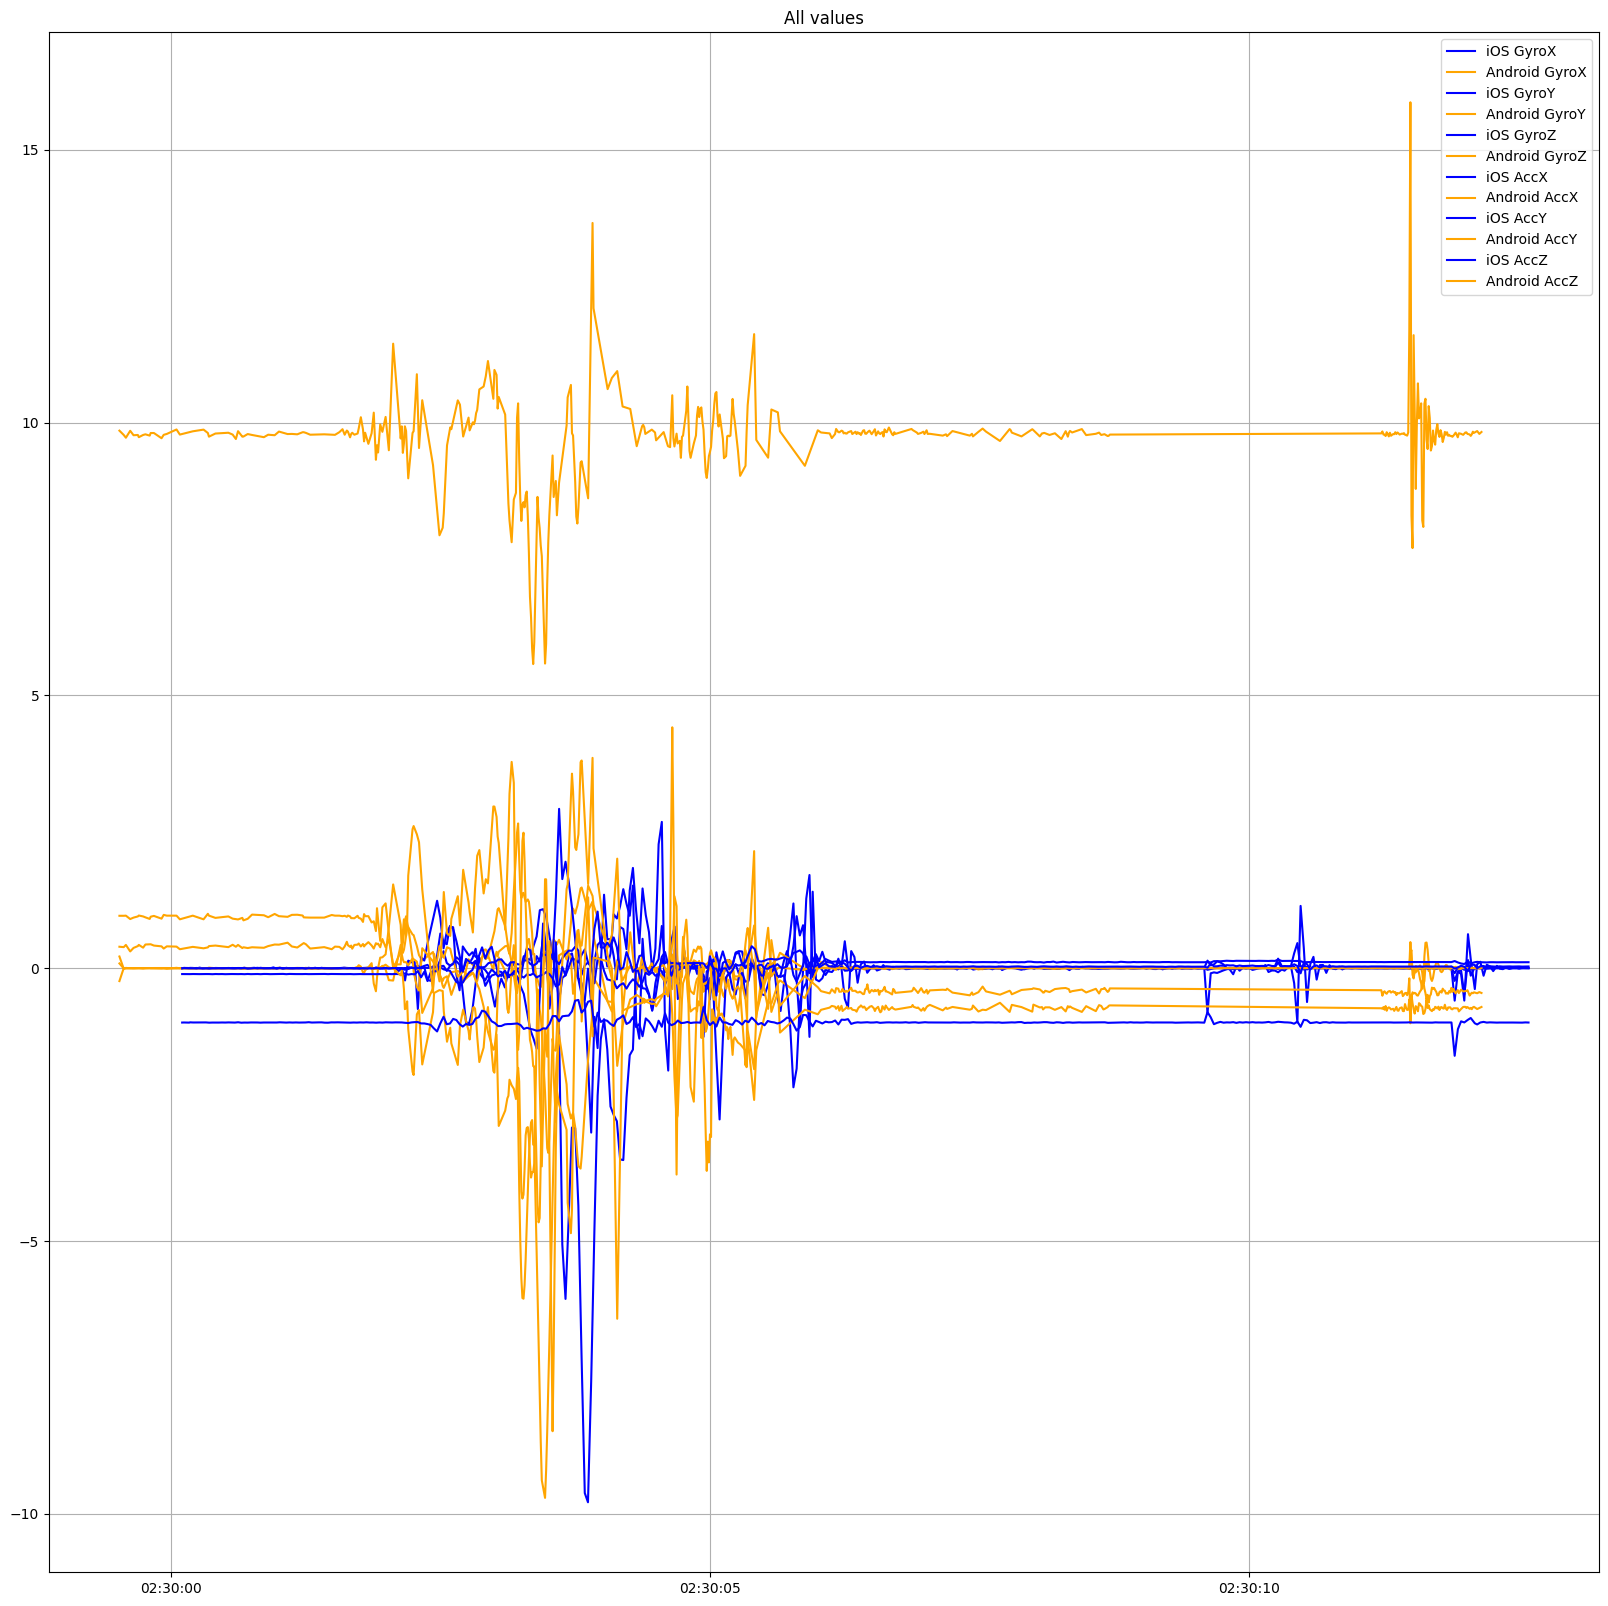

In [201]:
# plot all values for df1 and df2 on same figure
fig, axs = plt.subplots(1, 1, figsize=(20, 20))
for i in range(len(values[:-3])):
    # ignore NaN values and use tmp as variable
    tmp1 = df1.dropna()
    tmp2 = df2.dropna()

    axs.plot(tmp1['Timestamp'], tmp1[values[i]], label='iOS ' + values[i], color='blue')
    axs.plot(tmp2['Timestamp'], tmp2[values[i]], label='Android ' + values[i], color='orange')
    axs.set_title('All values')
    axs.grid(True)
    axs.legend()